In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

def train_linear_regression_reg(X, y, r=0.01):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    
    #Regularize the data
    XTX = XTX + r * np.eye(XTX.shape[0])

    #Compose the inverse of the matrix
    XTX_inv = np.linalg.inv(XTX)
    
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

def prepare_X(df):
    df_num = df
    df_num = df_num.fillna(0)
    x = df_num.values
    return x

def prepare_Mean(df):
    df_num = df
    for var in ['ram','storage', 'screen']:
      df_num[var] =  df_num[var].fillna(np.mean(df_num[var]))
    x = df_num.values
    print(df_num.isnull().sum())
    return x


def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = np.mean(se)
    return np.sqrt(mse)

In [3]:
def train_model(df_t, y_t, df_v, y_v):
    X_train = prepare_X(df_t)
    w0, w = train_linear_regression(X_train, y_t)
    
    X_val = prepare_X(df_v)
    y_pred = w0 + X_val.dot(w)
    
    score = rmse(y_v, y_pred)
    return score

def train_model_mean(df_t, y_t, df_v, y_v):
    X_train = prepare_Mean(df_t)
    w0, w = train_linear_regression(X_train, y_t)
    
    X_val = prepare_Mean(df_v)
    y_pred = w0 + X_val.dot(w)
    
    score = rmse(y_v, y_pred)
    return score

In [4]:
def train_modael_reg(df_t, y_t, df_v, y_v):
    for i in [0, 0.01,0.001, 0.1, 1, 5, 10, 100]:
        X_train = prepare_X(df_t)
        w0, w = train_linear_regression_reg(X_train, y_t, i)
        
        X_val = prepare_X(df_v)
        y_pred = w0 + X_val.dot(w)
        
        score = rmse(y_v, y_pred)
        print(i, score)
    return None

def train_modael_reg_mean(df_t, y_t, df_v, y_v):
    for i in [0, 0.01, 0.1, 1, 5, 10, 100]:
        
        X_train = prepare_Mean(df_t)
        w0, w = train_linear_regression_reg(X_train, y_t, i)
        
        X_val = prepare_X(df_v)
        y_pred = w0 + X_val.dot(w)
        
        score = rmse(y_v, y_pred)
        print(i, score)
    return None

In [5]:
df = pd.read_csv("laptops.csv")

In [6]:
df

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


In [7]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [8]:
df.columns 

Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')

In [9]:
#Selected columns
base = ['ram','storage', 'screen', 'final_price']
df_val = df.copy()

In [10]:
df_train = df_val[base]

df_train

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


<Axes: xlabel='final_price', ylabel='Count'>

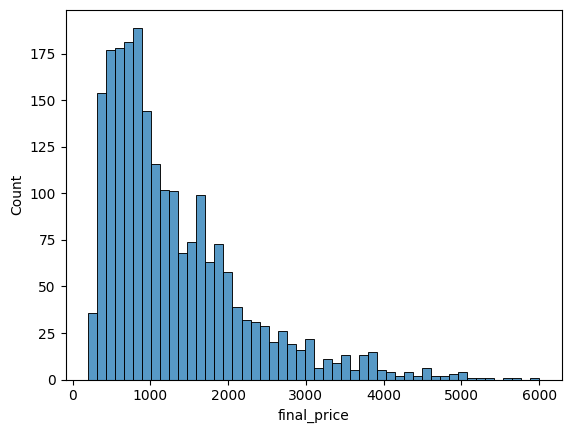

In [11]:
sns.histplot(df.final_price[df.final_price < 7000], bins=50)

# Question 1

In [12]:
df_train.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

# Question 2

In [13]:
df["ram"].describe()

count    2160.000000
mean       15.413889
std         9.867815
min         4.000000
25%         8.000000
50%        16.000000
75%        16.000000
max       128.000000
Name: ram, dtype: float64

# Prepare and split the dataset

In [14]:
n = len(df_train)
#Test and validation
n_test = int(n * 0.2)
n_val = int(n * 0.2)
n_train = n - (n_test + n_val)

n, n_train + n_test + n_val

(2160, 2160)

In [15]:
# Distribute the data according to the split and make sure it is shuffle to avoid orderliness
# get the range of data
idx = np.arange(n)

#Shuffle the range with seed to have a constant index across
np.random.seed(42)
np.random.shuffle(idx)
idx

array([2079,  668, 2073, ..., 1130, 1294,  860])

In [16]:
#let split from the train data
df_train = df.iloc[idx[:n_train]]

#get the test and validation
df_test = df.iloc[idx[n_train : n_train+n_val]]
df_val = df.iloc[idx[n_train+n_val:]]

len(df_test) + len(df_train) + len(df_val)

2160

In [17]:
#get the label data
y_train = df_train.final_price.values
y_test = df_test.final_price.values
y_val = npdf_val.final_price.values

y_train

array([1123.29,  201.05,  997.74, ..., 1059.  , 1671.  , 1056.  ])

In [18]:
#Dele the y_val from the data set to not accidentally resue it again

del df_train["final_price"]
del df_test["final_price"]
del df_val["final_price"]

In [19]:
#Check if deleted
df_train.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch
2079,MSI Modern 15 A11SBU-620XES Intel Core i7-1165...,Refurbished,MSI,Modern,Intel Core i7,32,1000,SSD,MX 450,15.6,No
668,Thomson Neo White Intel Celeron N4020/4GB/64GB...,New,Thomson,Neo,Intel Celeron,4,64,eMMC,NaN,14.1,No
2073,MSI Modern 14 B11SB-420XES Intel Core i7-1165G...,Refurbished,MSI,Modern,Intel Core i7,32,1000,SSD,MX 450,14.0,No
1113,ASUS ZenBook 13 OLED UX325EA Intel Evo Core i7...,New,Asus,ZenBook,Intel Evo Core i7,16,512,SSD,NaN,13.3,No
788,Acer Predator Triton 500 SE PT516-51s-75K6 Int...,New,Acer,Predator,Intel Core i7,32,1000,SSD,RTX 3080,16.0,No


In [20]:
# take the correct val again
features = ['ram','storage', 'screen']
df_train = df_train[features]
df_val = df_val[features]
df_test = df_test[features]

In [21]:
df_train

,ram,storage,screen
2079,32,1000,15.6
668,4,64,14.1
2073,32,1000,14.0
1113,16,512,13.3
788,32,1000,16.0
...,...,...,...
1777,8,256,14.0
183,32,1000,16.0
137,16,512,15.6
899,16,512,14.0


# Question 3

In [22]:
# Training the model on  fillna
train_model(df_train, y_train, df_val, y_val)

np.float64(547.0423327538903)

In [23]:
# Training the model on  mean
train_model_mean(df_train, y_train, df_val, y_val)

ram        0
storage    0
screen     0
dtype: int64
ram        0
storage    0
screen     0
dtype: int64


np.float64(547.3177984414446)

In [24]:
# With regularization
train_modael_reg(df_train, y_train, df_val, y_val)

0 547.3177984414446
0.01 547.3153085793299
0.001 547.3175486640041
0.1 547.2936747568896
1 547.1402758633343
5 547.0723833058938
10 547.2853243317322
100 548.3736324078883


In [25]:
def train_model_onseeds(df_num, seed=42):
    df = df_num.copy()
    n = len(df)
    
    #Test and validate
    n_test = int(n * 0.2)
    n_val = int(n * 0.2)
    n_train = n - (n_test + n_val)

    idx = np.arange(n)

    #Shuffle the range with seed to have a constant index across
    np.random.seed(seed)
    np.random.shuffle(idx)
    idx

    #let split from the train data
    df_train = df.iloc[idx[:n_train]]
    
    #get the test and validation
    df_test = df.iloc[idx[n_train : n_train+n_val]]
    df_val = df.iloc[idx[n_train+n_val:]]
    
    len(df_test) + len(df_train) + len(df_val)

    #get the label data
    y_train = df_train.final_price.values
    y_test = df_test.final_price.values
    y_val = df_val.final_price.values
    
    #Delete predicted val
    del df_train["final_price"]
    del df_test["final_price"]
    del df_val["final_price"]

    #Taking the features
    features = ['ram','storage', 'screen']
    df_train = df_train[features]
    df_val = df_val[features]
    df_test = df_test[features]
    
    score = train_model(df_train, y_train, df_val, y_val)
    return round(score, 2)

In [26]:
std = []
for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    score = train_model_onseeds(df, i)
    print(score)
    std.append(score)


578.24
570.17
594.94
626.17
611.53
573.7
543.51
631.02
672.99
614.11


In [27]:
np.std(std)

np.float64(35.42822626099139)

In [28]:
df_full = pd.concat([df_train, df_val]).reset_index(drop=True)

In [29]:
df_full

,ram,storage,screen
0,32,1000,15.6
1,4,64,14.1
2,32,1000,14.0
3,16,512,13.3
4,32,1000,16.0
...,...,...,...
1723,8,512,15.0
1724,8,256,15.6
1725,8,256,13.3
1726,8,512,14.0


In [30]:
y_full = np.concatenate([y_train, y_val])

In [31]:
train_modael_reg(df_full, y_full, df_test, y_test)

0 597.9452055133863
0.01 597.9424538899649
0.001 597.9449297837361
0.1 597.9182479865709
1 597.7239297058928
5 597.4236199566964
10 597.4637844660444
100 598.4210075129986
